In [16]:

import sqlite3
import pandas as pd

# Connect to the SQLite database (replace 'your_database.db' with your actual file)
conn = sqlite3.connect(r'C:\Users\Oluwafunmilayo Basil\Documents\EBUNOLUWA\3signet\AdventureWorks.db')

# Example query: Fetch sales data with product names and regions
query = """
SELECT 
    S.OrderDate, 
    S.Revenue, 
    P.ProductName, 
    T.Region 
FROM AdventureWorks_Sales_Combined S
JOIN AdventureWorks_Products P ON S.ProductKey = P.ProductKey
JOIN AdventureWorks_Territories T ON S.TerritoryKey = T.SalesTerritoryKey
"""
# Load data into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Preview the data
print(df.head())


  OrderDate    Revenue             ProductName          Region
0  1/1/2015   699.0982      Road-650 Black, 58       Northwest
1  1/1/2015  3578.2700        Road-150 Red, 48       Southwest
2  1/1/2015  3374.9900  Mountain-100 Black, 44       Australia
3  1/1/2015   699.0982      Road-650 Black, 44          Canada
4  1/2/2015  3578.2700        Road-150 Red, 48  United Kingdom


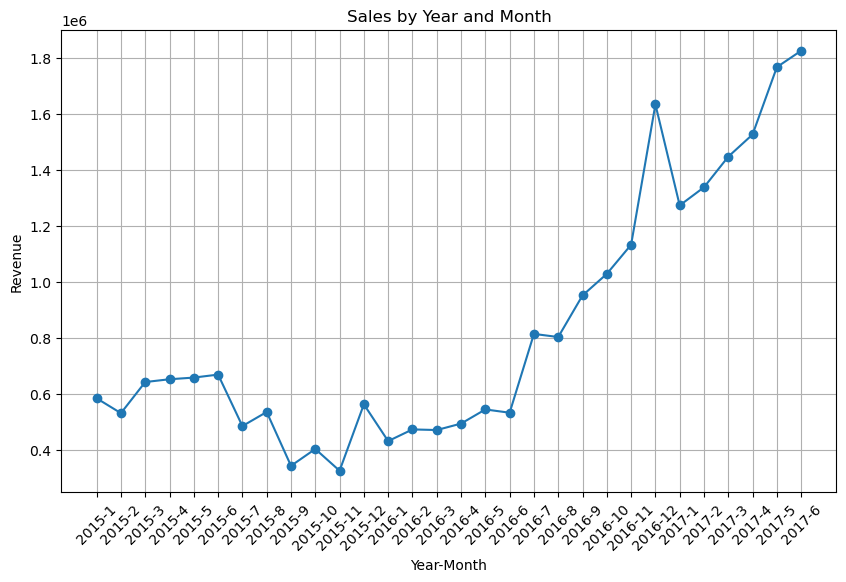

In [66]:
import matplotlib.pyplot as plt

# Convert OrderDate to datetime and extract year, month
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['Year'] = df['OrderDate'].dt.year
df['Month'] = df['OrderDate'].dt.month

# Group sales by year and month
sales_by_year_month = df.groupby(['Year', 'Month']).agg({'Revenue': 'sum'}).reset_index()

# Plot sales over time
plt.figure(figsize=(10, 6))
plt.plot(sales_by_year_month['Year'].astype(str) + '-' + sales_by_year_month['Month'].astype(str),
         sales_by_year_month['Revenue'], marker='o')

plt.title('Sales by Year and Month')
plt.xlabel('Year-Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('sales_trend_by_year_and_month.png')  # Save the figure
plt.show()


<Figure size 1000x600 with 0 Axes>

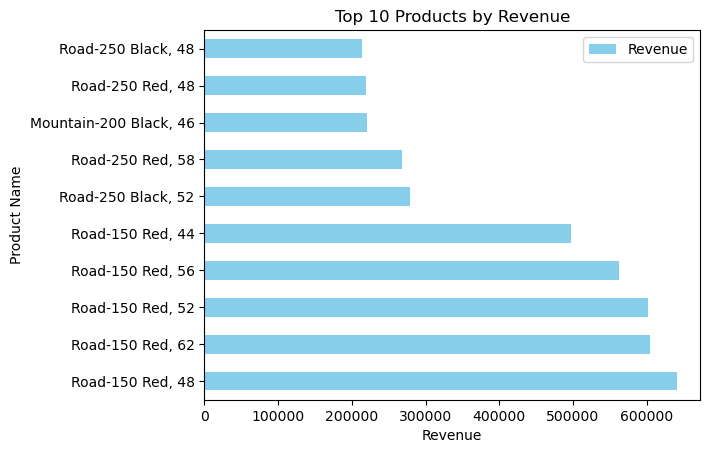

In [68]:
# Filter data for specific periods (e.g., 2015, July 2016, September 2017)
filtered_df = df[(df['OrderDate'].dt.year == 2015) | 
                 ((df['OrderDate'].dt.year == 2016) & (df['OrderDate'].dt.month == 7)) | 
                 ((df['OrderDate'].dt.year == 2017) & (df['OrderDate'].dt.month == 9))]

# Group by ProductName and sum revenue
top_products = filtered_df.groupby('ProductName')['Revenue'].sum().reset_index()

# Plot top products
plt.figure(figsize=(10, 6))
top_products.sort_values('Revenue', ascending=False).head(10).plot(kind='barh', x='ProductName', y='Revenue', color='skyblue')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Product Name')
plt.savefig('Top 10_products.png')  # Save the figure
plt.show()


In [28]:
import sqlite3
import pandas as pd

# Reopen the connection
conn = sqlite3.connect(r'C:\Users\Oluwafunmilayo Basil\Documents\EBUNOLUWA\3signet\AdventureWorks.db')

# Execute the query
query_customers = """
SELECT 
    C.CustomerKey, 
    C.FirstName || ' ' || C.LastName AS CustomerName, 
    SUM(S.Revenue) AS TotalSpending
FROM AdventureWorks_Customers C
JOIN AdventureWorks_Sales_Combined S ON C.CustomerKey = S.CustomerKey
GROUP BY C.CustomerKey
"""

# Load the query result into a pandas DataFrame
df_customers = pd.read_sql_query(query_customers, conn)


# Preview the data
print(df_customers.head())


   CustomerKey       CustomerName  TotalSpending
0        11000           JON YANG      4656.3896
1        11001       EUGENE HUANG      2821.2122
2        11002       RUBEN TORRES      4466.8124
3        11003        CHRISTY ZHU      4532.9866
4        11004  ELIZABETH JOHNSON      4568.0838


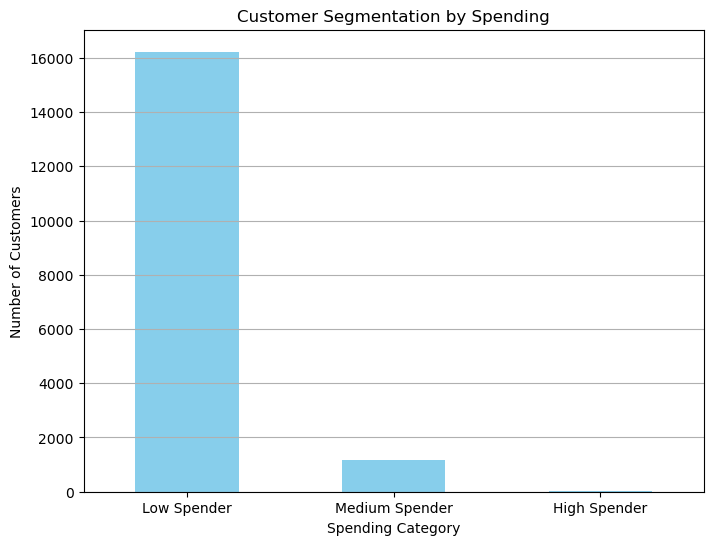

In [64]:
# Assume customer data is loaded and contains CustomerName and TotalSpending
query_customers = """
SELECT 
    C.CustomerKey, 
    C.FirstName || ' ' || C.LastName AS CustomerName, 
    SUM(S.Revenue) AS TotalSpending
FROM AdventureWorks_Customers C
JOIN AdventureWorks_Sales_Combined S ON C.CustomerKey = S.CustomerKey
GROUP BY C.CustomerKey
"""
import matplotlib.pyplot as plt

# Create a bar chart for customer segmentation
plt.figure(figsize=(8, 6))
df_customers['SpendingCategory'].value_counts().plot(kind='bar', color='skyblue')

plt.title('Customer Segmentation by Spending')
plt.xlabel('Spending Category')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.savefig('Customer_Segmentation_by_Spending.png')  # Save the figure
plt.show()


In [38]:
# Query to get region-wise total spending
query_region_spending = """
SELECT 
    T.Region, 
    SUM(S.Revenue) AS TotalSpending
FROM AdventureWorks_Sales_Combined S
JOIN AdventureWorks_Territories T ON S.TerritoryKey = T.SalesTerritoryKey
GROUP BY T.Region
"""

# Load the result into a pandas DataFrame
df_region_spending = pd.read_sql_query(query_region_spending, conn)

# Preview the data
print(df_region_spending.head())



      Region  TotalSpending
0  Australia   7.416456e+06
1     Canada   1.769246e+06
2    Central   3.143060e+03
3     France   2.362643e+06
4    Germany   2.524680e+06


<Figure size 1000x600 with 0 Axes>

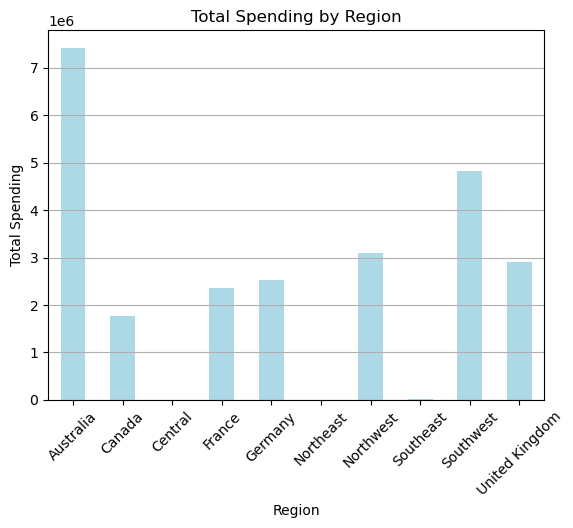

In [62]:
import matplotlib.pyplot as plt

# Plot total spending by region
plt.figure(figsize=(10, 6))
df_region_spending.plot(kind='bar', x='Region', y='TotalSpending', color='lightblue', legend=False)

plt.title('Total Spending by Region')
plt.xlabel('Region')
plt.ylabel('Total Spending')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.savefig('Total spending_by_region.png')  # Save the figure
plt.show()


In [42]:
# Query to get region, product name, and total spending
query_region_product = """
SELECT 
    T.Region, 
    P.ProductName, 
    SUM(S.Revenue) AS TotalSpending
FROM AdventureWorks_Sales_Combined S
JOIN AdventureWorks_Territories T ON S.TerritoryKey = T.SalesTerritoryKey
JOIN AdventureWorks_Products P ON S.ProductKey = P.ProductKey
GROUP BY T.Region, P.ProductName
ORDER BY TotalSpending DESC
"""

# Load the query result into a pandas DataFrame
df_region_product = pd.read_sql_query(query_region_product, conn)

# Preview the data
print(df_region_product.head())


      Region              ProductName  TotalSpending
0  Australia   Mountain-200 Black, 42    342199.3994
1  Australia  Mountain-200 Silver, 38    339712.8144
2  Australia  Mountain-200 Silver, 42    323141.4576
3  Australia         Road-250 Red, 58    311963.4375
4  Australia       Road-250 Black, 52    307600.3125


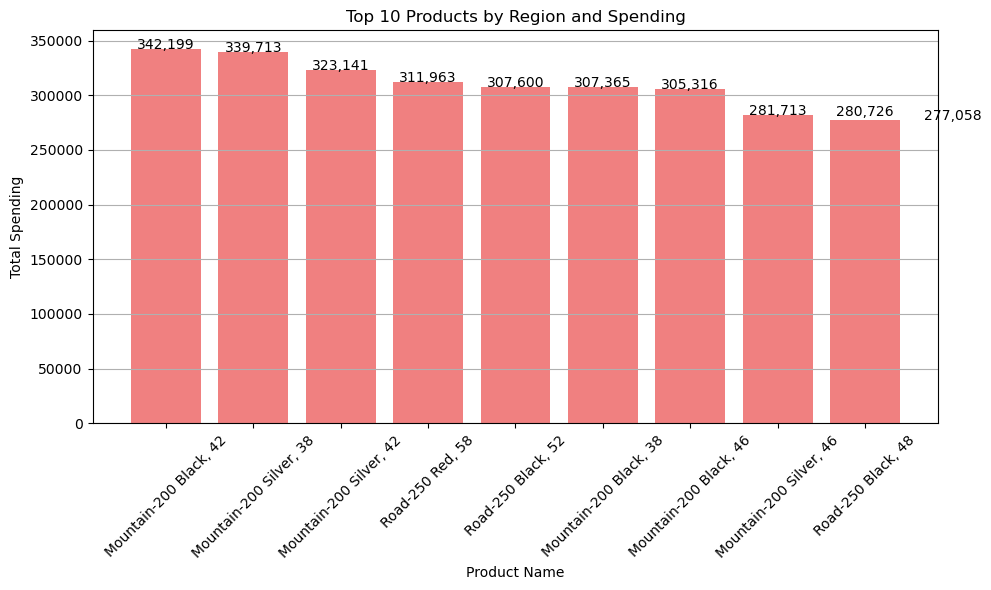

In [50]:
# Get the top 10 product-region combinations by total spending
df_top_10 = df_region_product.nlargest(10, 'TotalSpending')

# Plot the top 10 product-region combinations
plt.figure(figsize=(10, 6))

# Use a bar chart for the top products
plt.bar(df_top_10['ProductName'], df_top_10['TotalSpending'], color='lightcoral')

# Adding annotations for each bar
for i in range(len(df_top_10)):
    plt.text(i, df_top_10['TotalSpending'].iloc[i], f"{df_top_10['TotalSpending'].iloc[i]:,.0f}", ha='center')

plt.title('Top 10 Products by Region and Spending')
plt.xlabel('Product Name')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



In [112]:
# Query to get total spending by year and month
query_time_series = """
SELECT 
    strftime('%Y', OrderDate) AS Year,
    strftime('%m', OrderDate) AS Month,
    SUM(Revenue) AS TotalSpending
FROM AdventureWorks_Sales_Combined
GROUP BY Year, Month
ORDER BY Year, Month
"""

# Load the result into a pandas DataFrame
df_time_series = pd.read_sql_query(query_time_series, conn)
# Preview the data
print(df_time_series.head())


   Year Month  TotalSpending
0  None  None   2.491459e+07


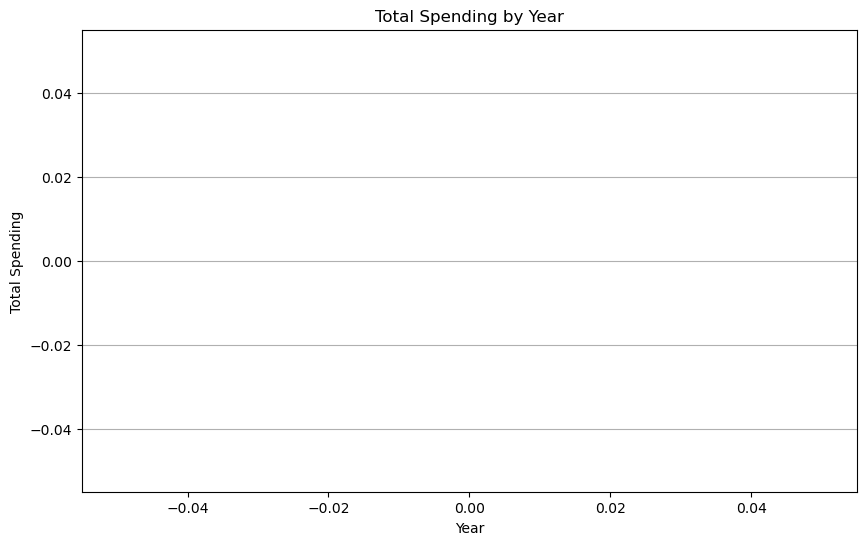

In [91]:
import matplotlib.pyplot as plt

# Group data by year
df_yearly_spending = df_time_series.groupby('Year')['TotalSpending'].sum().reset_index()

# Plot total spending by year
plt.figure(figsize=(10, 6))
plt.bar(df_yearly_spending['Year'], df_yearly_spending['TotalSpending'], color='skyblue')

plt.title('Total Spending by Year')
plt.xlabel('Year')
plt.ylabel('Total Spending')
plt.grid(axis='y')
plt.show()



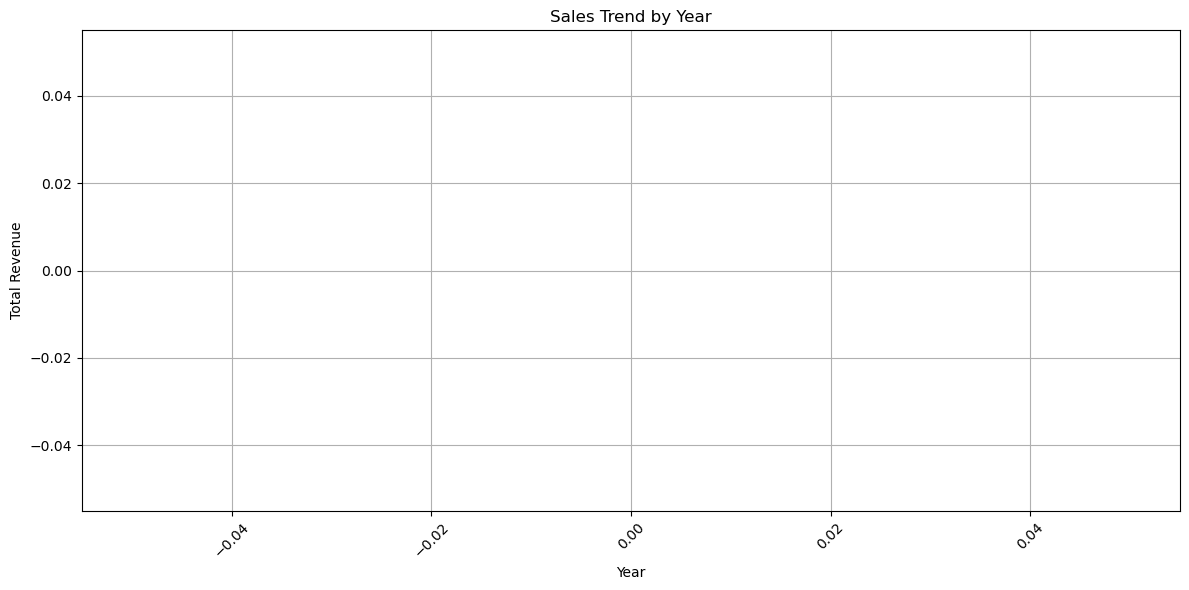

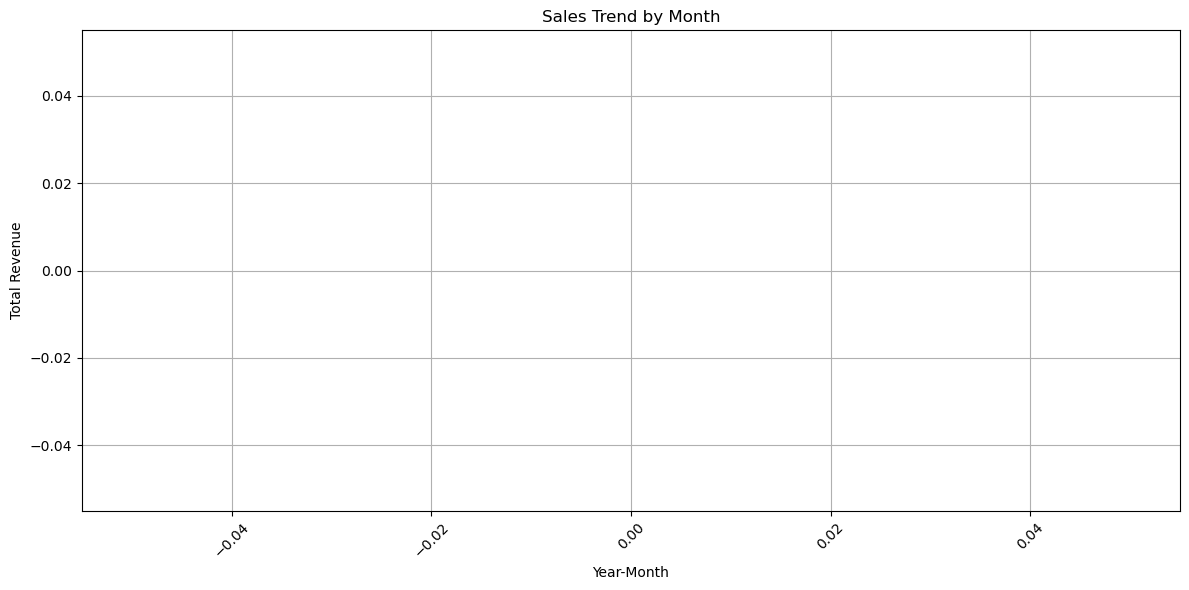

In [94]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
db_file = r'C:\Users\Oluwafunmilayo Basil\Documents\EBUNOLUWA\3signet\AdventureWorks.db'  # Replace with your .db file path
conn = sqlite3.connect(db_file)

# Query for sales by year
sales_by_year_query = """
SELECT 
    strftime('%Y', OrderDate) AS Year, 
    SUM(Revenue) AS TotalRevenue
FROM AdventureWorks_Sales_Combined
GROUP BY Year
ORDER BY Year;
"""
sales_by_year = pd.read_sql_query(sales_by_year_query, conn)

# Query for sales by month
sales_by_month_query = """
SELECT 
    strftime('%Y-%m', OrderDate) AS YearMonth, 
    SUM(Revenue) AS TotalRevenue
FROM AdventureWorks_Sales_Combined
GROUP BY YearMonth
ORDER BY YearMonth;
"""
sales_by_month = pd.read_sql_query(sales_by_month_query, conn)

# Close the database connection
conn.close()

# Create the sales trend visualization by year
plt.figure(figsize=(12, 6))
plt.plot(sales_by_year['Year'], sales_by_year['TotalRevenue'], marker='o', color='b')
plt.title('Sales Trend by Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('sales_trend_by_year.png')  # Save the figure
plt.show()

# Create the sales trend visualization by month
plt.figure(figsize=(12, 6))
plt.plot(sales_by_month['YearMonth'], sales_by_month['TotalRevenue'], marker='o', color='g')
plt.title('Sales Trend by Month')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('sales_trend_by_month.png')  # Save the figure
plt.show()


In [110]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
db_file = r'C:\Users\Oluwafunmilayo Basil\Documents\EBUNOLUWA\3signet\AdventureWorks.db'  # Replace with your .db file path
conn = sqlite3.connect(db_file)

# Query for top-performing products
products_query = """
SELECT 
    P.ProductName, 
    SUM(S.OrderQuantity * P.ProductPrice) AS TotalRevenue,  -- Adjust this to match your revenue calculation
    strftime('%Y', S.OrderDate) AS Year,
    strftime('%m', S.OrderDate) AS Month
FROM AdventureWorks_Sales_Combined S
JOIN AdventureWorks_Products P ON S.ProductKey = P.ProductKey
WHERE (strftime('%Y', S.OrderDate) = '2015' OR 
      (strftime('%Y-%m', S.OrderDate) = '2016' AND strftime('%m', S.OrderDate) = '07') OR 
      (strftime('%Y-%m', S.OrderDate) = '2017-09'))
GROUP BY P.ProductName, Year, Month
ORDER BY TotalRevenue DESC;
"""
products_df = pd.read_sql_query(products_query, conn)

# Query for top-performing regions
regions_query = """
SELECT 
    T.Region, 
    SUM(S.OrderQuantity * S.UnitPrice) AS TotalRevenue,  -- Adjust this to match your revenue calculation
    strftime('%Y', S.OrderDate) AS Year,
    strftime('%m', S.OrderDate) AS Month
FROM AdventureWorks_Sales_Combined S
JOIN AdventureWorks_Territories T ON S.TerritoryKey = T.SalesTerritoryKey
WHERE (strftime('%Y', S.OrderDate) = '2015' OR 
      (strftime('%Y', S.OrderDate) = '2016' AND strftime('%m', S.OrderDate) = '07') OR 
      (strftime('%Y-%m', S.OrderDate) = '2017-09'))
GROUP BY T.Region, Year, Month
ORDER BY TotalRevenue DESC;
"""
regions_df = pd.read_sql_query(regions_query, conn)

# Close the database connection
conn.close()

# Check and plot Top Products by Revenue
if not products_df.empty:
    plt.figure(figsize=(10, 6))
    plt.barh(products_df['ProductName'], products_df['TotalRevenue'], color='skyblue')
    plt.title('Top Products by Revenue (2015, July 2016, September 2017)')
    plt.xlabel('Total Revenue')
    plt.ylabel('Product Name')
    plt.tight_layout()
    plt.savefig('top_products.png')  # Save the figure
    plt.show()
else:
    print("No data available for top products plotting.")

# Check and plot Top Regions by Revenue
if not regions_df.empty:
    plt.figure(figsize=(10, 6))
    plt.barh(regions_df['Region'], regions_df['TotalRevenue'], color='salmon')
    plt.title('Top Regions by Revenue (2015, July 2016, September 2017)')
    plt.xlabel('Total Revenue')
    plt.ylabel('Region')
    plt.tight_layout()
    plt.savefig('top_regions.png')  # Save the figure
    plt.show()
else:
    print("No data available for top regions plotting.")


DatabaseError: Execution failed on sql '
SELECT 
    T.Region, 
    SUM(S.OrderQuantity * S.UnitPrice) AS TotalRevenue,  -- Adjust this to match your revenue calculation
    strftime('%Y', S.OrderDate) AS Year,
    strftime('%m', S.OrderDate) AS Month
FROM AdventureWorks_Sales_Combined S
JOIN AdventureWorks_Territories T ON S.TerritoryKey = T.SalesTerritoryKey
WHERE (strftime('%Y', S.OrderDate) = '2015' OR 
      (strftime('%Y', S.OrderDate) = '2016' AND strftime('%m', S.OrderDate) = '07') OR 
      (strftime('%Y-%m', S.OrderDate) = '2017-09'))
GROUP BY T.Region, Year, Month
ORDER BY TotalRevenue DESC;
': no such column: S.UnitPrice